# 선형 회귀 분석의 기초

회귀 분석(regression analysis)은 입력 자료(독립 변수) $x$와 이에 대응하는 출력 자료(종속 변수) $y$간의 관계를 정량과 하기 위한 작업이다. 

회귀 분석에는 결정론적 모형(Deterministic Model)과 확률적 모형(Probabilistic Model)이 있다.

결정론적 모형은 단순히 독립 변수 $x$에 대해 대응하는 종속 변수 $y$를 계산하는 함수를 만드는 과정이다.

$$ \hat{y} = f \left( x; \{ x_1, y_1, x_2, y_2, \cdots, x_N, y_N \} \right) = f (x; D) = f(x) $$

여기에서 $ \{ x_1, y_1, x_2, y_2, \cdots, x_N, y_N \} $ 는 모형 계수 추정을 위한 과거 자료이다.

만약 함수가 선형 함수이면 선형 회귀 분석(linear regression analysis)이라고 한다.

$$ \hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D $$

## Augmentation

일반적으로 회귀 분석에 앞서 다음과 같이 상수항을 독립 변수에 포함하는 작업이 필요할 수 있다. 이를 feature augmentation이라고 한다.

$$
x_i =
\begin{bmatrix}
x_{i1} \\ x_{i2} \\ \vdots \\ x_{iD}
\end{bmatrix}
\rightarrow 
x_{i,a} =
\begin{bmatrix}
1 \\ x_{i1} \\ x_{i2} \\ \vdots \\ x_{iD}
\end{bmatrix}
$$

augmentation을 하게 되면 모든 원소가 1인 벡터를 feature matrix 에 추가된다.


$$
X =
\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1D} \\
x_{21} & x_{22} & \cdots & x_{2D} \\
\vdots & \vdots & \vdots & \vdots \\
x_{N1} & x_{N2} & \cdots & x_{ND} \\
\end{bmatrix}
\rightarrow 
X_a =
\begin{bmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1D} \\
1 & x_{21} & x_{22} & \cdots & x_{2D} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_{N1} & x_{N2} & \cdots & x_{ND} \\
\end{bmatrix}
$$

augmentation을 하면 가중치 벡터(weight vector)도 차원이 증가하여 전체 수식이 다음과 같이 단순화 된다.

$$ w_0 + w_1 x_1 + w_2 x_2
= 
\begin{bmatrix}
1 & x_1 & x_2
\end{bmatrix}
\begin{bmatrix}
w_0 \\ w_1 \\ w_2
\end{bmatrix}
= x_a^T w
$$

In [2]:
from sklearn.datasets import make_regression
bias = 100
X0, y, coef = make_regression(n_samples=100, n_features=1, bias=bias, noise=10, coef=True, random_state=1)
X = np.hstack([np.ones_like(X0), X0])
X[:5]

array([[ 1.        , -0.61175641],
       [ 1.        , -0.24937038],
       [ 1.        ,  0.48851815],
       [ 1.        ,  0.76201118],
       [ 1.        ,  1.51981682]])

## OLS (Ordinary Least Squares)

OLS는 가장 기본적인 결정론적 회귀 방법으로 Residual Sum of Squares(RSS)를 최소화하는 가중치 벡터 값을 미분을 통해 구한다.


* Residual 잔차
$$ e_i = {y}_i - x_i^T w $$


* Stacking (Vector Form)
$$ e = {y} - Xw $$



* Residual Sum of Squares (RSS)
$$\begin{eqnarray}
\text{RSS} 
&=& \sum (y_i - \hat{y}_i)^2 \\
&=& \sum e_i^2 = e^Te \\
&=& (y - Xw)^T(y - Xw) \\
&=& y^Ty - 2y^T X w + w^TX^TXw  
\end{eqnarray}$$



* Minimize using Gradient
$$ \dfrac{\partial \text{RSS}}{\partial w} = -2 X^T y + 2 X^TX w = 0 $$


$$ X^TX w = X^T y $$


$$  w = (X^TX)^{-1} X^T y $$


여기에서 그레디언트를 나타내는 다음 식을 Normal equation 이라고 한다.

$$ X^T y - X^TX w = 0 $$

Normal equation 에서 잔차에 대한 다음 특성을 알 수 있다.

$$ X^T (y - X w ) = X^T e = 0 $$

In [3]:
y = y.reshape(len(y), 1)
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
print("bias:", bias)
print("coef:", coef)
print("w:\n", w)

bias: 100
coef: 80.7105195619
w:
 [[ 102.02701439]
 [  81.59750943]]


In [4]:
w = np.linalg.lstsq(X, y)[0]
w

array([[ 102.02701439],
       [  81.59750943]])

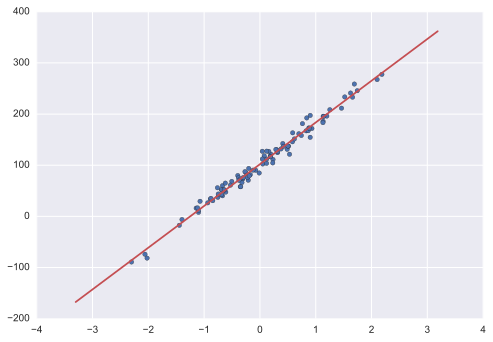

In [5]:
xx = np.linspace(np.min(X0) - 1, np.max(X0) + 1, 1000)
XX = np.vstack([np.ones(xx.shape[0]), xx.T]).T
yy = np.dot(XX, w)
plt.scatter(X0, y)
plt.plot(xx, yy, 'r-')
plt.show()

##  scikit-learn 패키지를 사용한  선형 회귀 분석

sklearn 패키지를 사용하여 선형 회귀 분석을 하는 경우에는 linear_model 서브 패키지의 `LinearRegression` 클래스를 사용한다.


* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


* 입력 인수	
 * `fit_intercept` : 불리언, 옵션
    * 상수상 추가 여부
 * `normalize` : 불리언, 옵션
    * 회귀 분석전에 정규화 여부

* 속성
 * `coef_` : 추정된 가중치 벡터
 * `intercept_` : 추정된 상수항 

### Diabetes Regression

In [6]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
dfX_diabetes = pd.DataFrame(diabetes.data, columns=["X%d" % (i+1) for i in range(np.shape(diabetes.data)[1])])
dfy_diabetes = pd.DataFrame(diabetes.target, columns=["target"])
df_diabetes0 = pd.concat([dfX_diabetes, dfy_diabetes], axis=1)
df_diabetes0.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


In [7]:
from sklearn.linear_model import LinearRegression
model_diabetes = LinearRegression().fit(diabetes.data, diabetes.target)
print(model_diabetes.coef_)
print(model_diabetes.intercept_)

[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
152.133484163


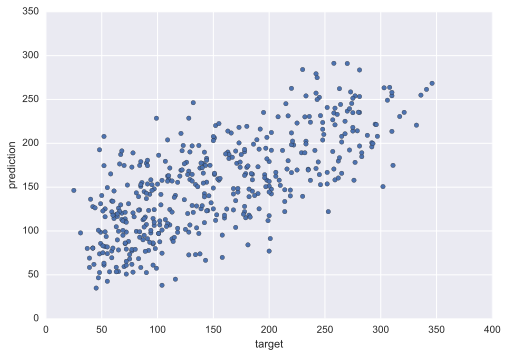

In [8]:
predictions = model_diabetes.predict(diabetes.data)
plt.scatter(diabetes.target, predictions)
plt.xlabel("target")
plt.ylabel("prediction")
plt.show()

In [9]:
mean_abs_error = (np.abs(((diabetes.target - predictions)/diabetes.target)*100)).mean()
print("MAE: %.2f%%" % (mean_abs_error))

MAE: 38.79%


In [10]:
sk.metrics.median_absolute_error(diabetes.target, predictions)

38.522833662660631

In [11]:
sk.metrics.mean_squared_error(diabetes.target, predictions)

2859.6903987680657

### Boston Housing Price

In [12]:
from sklearn.datasets import load_boston
boston = load_boston()
dfX_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy_boston = pd.DataFrame(boston.target, columns=["MEDV"])
df_boston0 = pd.concat([dfX_boston, dfy_boston], axis=1)
df_boston0.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [13]:
model_boston = LinearRegression().fit(boston.data, boston.target)
print(model_boston.coef_)
print(model_boston.intercept_)

[ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]
36.4911032804


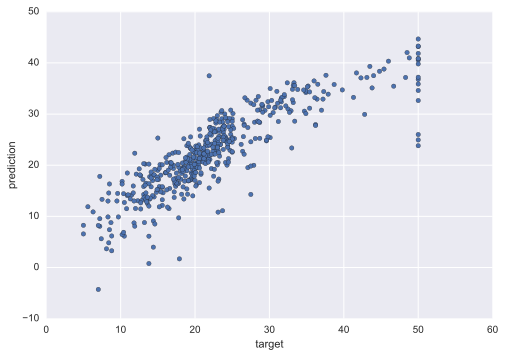

In [14]:
predictions = model_boston.predict(boston.data)
plt.scatter(boston.target, predictions)
plt.xlabel("target")
plt.ylabel("prediction")
plt.show()

In [15]:
mean_abs_error = (np.abs(((boston.target - predictions)/boston.target)*100)).mean()
print("MAE: %.2f%%" % (mean_abs_error))

MAE: 16.43%


In [16]:
sk.metrics.median_absolute_error(boston.target, predictions)

2.4559464328035201

In [17]:
sk.metrics.mean_squared_error(boston.target, predictions)

21.897779217687496

## statsmodels 를 사용한 선형 회귀 분석

statsmodels 패키지에서는 `OLS` 클래스를 사용하여 선형 회귀 분석을 실시한다.

* http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

`statsmodels.regression.linear_model.OLS(endog, exog=None)`

* 입력 인수
 * `endog` : 종속 변수. 1차원 배열
 * `exog` : 독립 변수, 2차원 배열. 

statsmodels 의 `OLS` 클래스는 자동으로 상수항을 만들어주지 않기 때문에 사용자가 `add_constant` 명령으로 상수항을 추가해야 한다.


모형 객체가 생성되면 `fit`, `predict` 메서드를 사용하여 추정 및 예측을 실시한다.

예측 결과는 `RegressionResults` 클래스 객체로 출력되면 `summary` 메서드로 결과 보고서를 볼 수 있다.

In [18]:
df_diabetes = sm.add_constant(df_diabetes0)
df_diabetes.tail()

,const,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,target
437,1,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,1,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,1,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,1,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,1,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


In [19]:
model_diabetes2 = sm.OLS(df_diabetes.ix[:, -1], df_diabetes.ix[:, :-1])
result_diabetes2 = model_diabetes2.fit()
result_diabetes2

In [20]:
print(result_diabetes2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Fri, 03 Jun 2016   Prob (F-statistic):           3.83e-62
Time:                        11:46:38   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

In [21]:
df_boston = sm.add_constant(df_boston0)
model_boston2 = sm.OLS(df_boston.ix[:, -1], df_boston.ix[:, :-1])
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 03 Jun 2016   Prob (F-statistic):          6.95e-135
Time:                        11:46:38   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

`RegressionResults` 클래스는 분석 결과를 다양한 속성에 저장해주므로 추후 사용자가 선택하여 활용할 수 있다.

In [22]:
dir(result_boston2)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',
 'mse_model',
 'mse_resid',
 'mse_total',
 'nobs',
 'normalized_cov_params',
 'outlier_test',
 'para

statsmodel는 다양한 회귀 분석 결과 플롯도 제공한다.


* plot_fit(results, exog_idx)	Plot fit against one regressor.
* abline_plot([intercept, ...])	Plots a line given an intercept and slope.
* influence_plot(results[, ...])	Plot of influence in regression.
* plot_leverage_resid2(results)	Plots leverage statistics vs.
* plot_partregress(endog, ...)	Plot partial regression for a single regressor.
* plot_ccpr(results, exog_idx)	Plot CCPR against one regressor.
* plot_regress_exog(results, ...)	Plot regression results against one regressor.


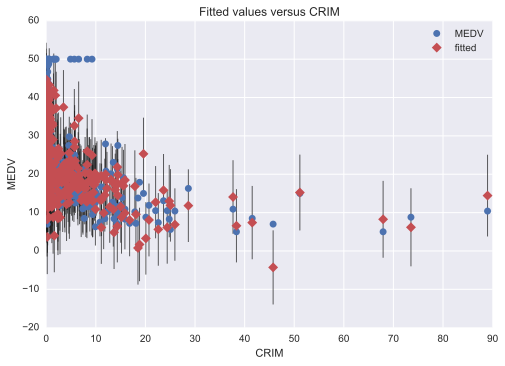

In [23]:
sm.graphics.plot_fit(result_boston2, "CRIM")
plt.show()